In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

data = pd.read_csv("data/Customer_Data.csv")

# Drop User ID
data = data.drop("User ID", axis=1)
data = data.drop("Gender", axis=1)


In [2]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
# Select features

X = data[["Age", "EstimatedSalary"]]
y = data["Purchased"]

In [4]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'EstimatedSalary'])
    ])


In [7]:
transformed_data = preprocessor.fit_transform(data)

In [8]:
df_transformed = pd.DataFrame(transformed_data, columns=preprocessor.get_feature_names_out())


In [9]:
df_transformed

,num__Age,num__EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [10]:
# Create a pipeline
lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression()),
])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]


In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

lr_accuracy = accuracy_score(y_test, y_pred)
lr_auc = roc_auc_score(y_test, y_proba)
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
lr_classification_report = classification_report(y_test, y_pred, output_dict=True)

print("\nEvaluation Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"ROC AUC: {lr_auc:.4f}")
print("\nConfusion Matrix:")
print(lr_confusion_matrix)
print("\nClassification Report:")
print(lr_classification_report)


Evaluation Metrics:
Accuracy: 0.8625
ROC AUC: 0.9684

Confusion Matrix:
[[50  2]
 [ 9 19]]

Classification Report:
{'0': {'precision': 0.847457627118644, 'recall': 0.9615384615384616, 'f1-score': 0.9009009009009009, 'support': 52.0}, '1': {'precision': 0.9047619047619048, 'recall': 0.6785714285714286, 'f1-score': 0.7755102040816326, 'support': 28.0}, 'accuracy': 0.8625, 'macro avg': {'precision': 0.8761097659402743, 'recall': 0.820054945054945, 'f1-score': 0.8382055524912668, 'support': 80.0}, 'weighted avg': {'precision': 0.8675141242937853, 'recall': 0.8625, 'f1-score': 0.857014157014157, 'support': 80.0}}


In [12]:
# Model interpretation

# Get feature names (after preprocessing)
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.named_steps['classifier'].coef_[0]  # LogisticRegression coefficients
})

print(coef_df)

                Feature  Coefficient
0              num__Age     1.965098
1  num__EstimatedSalary     1.135090


In [13]:
# from sklearn.linear_model import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Now do random forest classifier
# Create a pipeline
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier()),
])

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

In [14]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_proba)
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
rf_classification_report = classification_report(y_test, y_pred, output_dict=True)

print("\nEvaluation Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"ROC AUC: {rf_auc:.4f}")
print("\nConfusion Matrix:")
print(rf_confusion_matrix)
print("\nClassification Report:")
print(rf_classification_report)


Evaluation Metrics:
Accuracy: 0.8875
ROC AUC: 0.9502

Confusion Matrix:
[[46  6]
 [ 3 25]]

Classification Report:
{'0': {'precision': 0.9387755102040817, 'recall': 0.8846153846153846, 'f1-score': 0.9108910891089109, 'support': 52.0}, '1': {'precision': 0.8064516129032258, 'recall': 0.8928571428571429, 'f1-score': 0.847457627118644, 'support': 28.0}, 'accuracy': 0.8875, 'macro avg': {'precision': 0.8726135615536537, 'recall': 0.8887362637362637, 'f1-score': 0.8791743581137774, 'support': 80.0}, 'weighted avg': {'precision': 0.892462146148782, 'recall': 0.8875, 'f1-score': 0.8886893774123175, 'support': 80.0}}


In [15]:
import xgboost as xgb

#Now do XGBoost
# Create a pipeline
# rf_model = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier()),
# ])

# # Split into train and test sets
X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Output probabilities
    eval_metric='logloss',        # Logarithmic loss for binary classification
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

c:\Users\manal\GIT\predict_purchase\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:36:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [16]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_proba)
xgb_confusion_matrix = confusion_matrix(y_test, y_pred)
xgb_classification_report = classification_report(y_test, y_pred, output_dict=True)

print("\nEvaluation Metrics:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"ROC AUC: {xgb_auc:.4f}")
print("\nConfusion Matrix:")
print(xgb_confusion_matrix)
print("\nClassification Report:")
print(xgb_classification_report)


Evaluation Metrics:
Accuracy: 0.9000
ROC AUC: 0.9533

Confusion Matrix:
[[46  6]
 [ 2 26]]

Classification Report:
{'0': {'precision': 0.9583333333333334, 'recall': 0.8846153846153846, 'f1-score': 0.92, 'support': 52.0}, '1': {'precision': 0.8125, 'recall': 0.9285714285714286, 'f1-score': 0.8666666666666667, 'support': 28.0}, 'accuracy': 0.9, 'macro avg': {'precision': 0.8854166666666667, 'recall': 0.9065934065934066, 'f1-score': 0.8933333333333333, 'support': 80.0}, 'weighted avg': {'precision': 0.9072916666666668, 'recall': 0.9, 'f1-score': 0.9013333333333333, 'support': 80.0}}


In [17]:
# Now to SVM

from sklearn.svm import SVC

#Now do XGBoost
# Create a pipeline
# rf_model = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier()),
# ])

# # Split into train and test sets
# X_processed = preprocessor.fit_transform(X)

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

svm_model = SVC(
    kernel='rbf',  # Radial Basis Function (for non-linear problems)
    C=1.0,         # Regularization parameter
    probability=True,  # Required for probability estimates
    random_state=42
)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1]

In [18]:
svm_accuracy = accuracy_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_proba)
svm_confusion_matrix = confusion_matrix(y_test, y_pred)
svm_classification_report = classification_report(y_test, y_pred, output_dict=True)

print("\nEvaluation Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"ROC AUC: {svm_auc:.4f}")
print("\nConfusion Matrix:")
print(svm_confusion_matrix)
print("\nClassification Report:")
print(svm_classification_report)


Evaluation Metrics:
Accuracy: 0.9250
ROC AUC: 0.9691

Confusion Matrix:
[[47  5]
 [ 1 27]]

Classification Report:
{'0': {'precision': 0.9791666666666666, 'recall': 0.9038461538461539, 'f1-score': 0.94, 'support': 52.0}, '1': {'precision': 0.84375, 'recall': 0.9642857142857143, 'f1-score': 0.9, 'support': 28.0}, 'accuracy': 0.925, 'macro avg': {'precision': 0.9114583333333333, 'recall': 0.9340659340659341, 'f1-score': 0.9199999999999999, 'support': 80.0}, 'weighted avg': {'precision': 0.9317708333333332, 'recall': 0.925, 'f1-score': 0.9259999999999999, 'support': 80.0}}


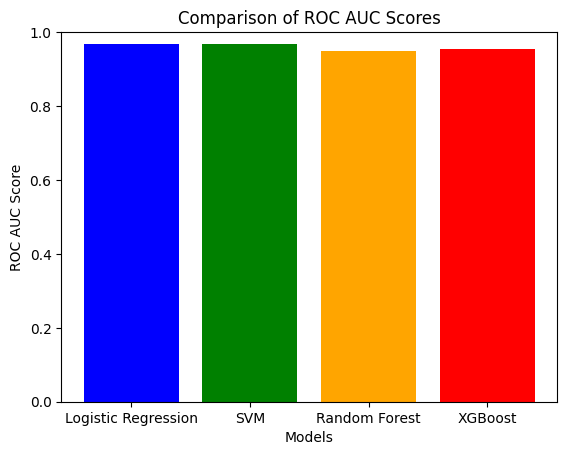

In [19]:
import matplotlib.pyplot as plt

# Define the ROC AUC scores
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']
roc_auc_scores = [lr_auc, svm_auc, rf_auc, xgb_auc]

# Plot the histogram
plt.bar(models, roc_auc_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('Comparison of ROC AUC Scores')
plt.ylim(0.0, 1.0)  # Set y-axis limits to reflect ROC AUC range
plt.show()

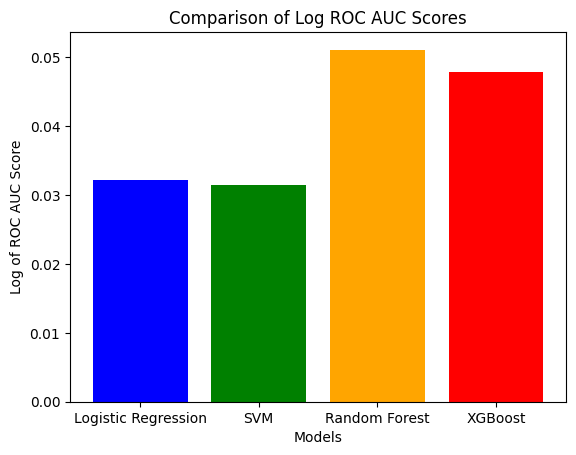

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define the ROC AUC scores
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']
roc_auc_scores = [lr_auc, svm_auc, rf_auc, xgb_auc]

# Compute the logarithm of the scores
log_roc_auc_scores = -np.log(roc_auc_scores)

# Plot the histogram
plt.bar(models, log_roc_auc_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Log of ROC AUC Score')
plt.title('Comparison of Log ROC AUC Scores')
plt.show()

In [22]:
svm_classification_report['accuracy']

0.925

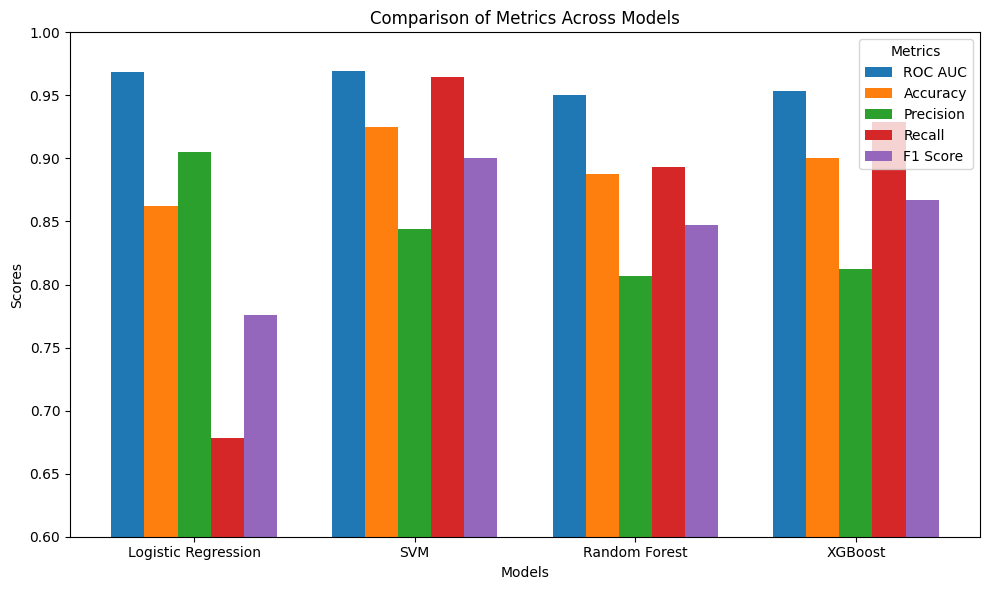

In [28]:
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']
metrics = ['ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Collect the metrics for each model
lr_metrics = [lr_auc, lr_accuracy, lr_classification_report['1']['precision'], lr_classification_report['1']['recall'], lr_classification_report['1']['f1-score']]
svm_metrics = [svm_auc, svm_accuracy, svm_classification_report['1']['precision'], svm_classification_report['1']['recall'], svm_classification_report['1']['f1-score']]
rf_metrics = [rf_auc, rf_accuracy, rf_classification_report['1']['precision'], rf_classification_report['1']['recall'], rf_classification_report['1']['f1-score']]
xgb_metrics = [xgb_auc, xgb_accuracy, xgb_classification_report['1']['precision'], xgb_classification_report['1']['recall'], xgb_classification_report['1']['f1-score']]

# Combine all metrics
all_metrics = [lr_metrics, svm_metrics, rf_metrics, xgb_metrics]

# Set up the bar chart
x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric as a separate bar group
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, [m[i] for m in all_metrics], width, label=metric)

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics Across Models')
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models)
ax.legend(title='Metrics')

ax.set_ylim(0.60,1.0)

plt.tight_layout()
plt.show()